In [1]:
using Revise

using RigidBodyDynamics
using RigidBodyDynamics: Bounds

using DrakeVisualizer
using Plots
using RigidBodyTreeInspector

using BilevelTrajOpt
gr(size=(500,500), html_output_format=:png);

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/8c8a043c2f00369f3e7ae550277d2a54e59a34ad-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/8c8a043c2f00369f3e7ae550277d2a54e59a34ad-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [2]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)
body = findbody(mechanism, "ball")
basejoint = joint_to_parent(body, mechanism)
floatingjoint = Joint(basejoint.name, frame_before(basejoint), frame_after(basejoint), QuaternionFloating{Float64}())
replace_joint!(mechanism, basejoint, floatingjoint)
position_bounds(floatingjoint) .= Bounds(-100, 100)
velocity_bounds(floatingjoint) .= Bounds(-100, 100)
env = parse_contacts(mechanism, urdf, .5);
x0 = MechanismState(mechanism)
Δt = 0.01;

In [20]:
q0 = [1., 0., 0., 0., 0., 0., .025]
v0 = [0., 0., 0., .25, 0. , 0.]
N = 10

set_configuration!(x0, q0)
set_velocity!(x0, v0)
setdirty!(x0)

println("Explicit Contacts")
traj_exp = BilevelTrajOpt.simulate(x0,env,Δt,N,implicit_contact=false);
println("Implicit Contacts")
traj_imp = BilevelTrajOpt.simulate(x0,env,Δt,N,implicit_contact=true);

Explicit Contacts


6-element Array{Float64,1}:
  0.0        
  0.0        
 -5.56714e-35
  7.12759e-7 
 -3.56489e-18
 -2.23205e-6 

Solve_Succeeded


6-element Array{Float64,1}:
 -1.54074e-33
 -3.30872e-24
 -2.16667e-34
  1.35286e-6 
 -7.07107e-18
 -3.47272e-6 

Solve_Succeeded


6-element Array{Float64,1}:
  0.0        
  3.30872e-24
  3.12964e-34
  1.47436e-6 
 -2.63885e-17
 -3.87542e-6 

Solve_Succeeded


6-element Array{Float64,1}:
  0.0        
  0.0        
  1.44445e-34
  5.66711e-7 
 -9.8994e-18 
 -2.51035e-6 

Solve_Succeeded


6-element Array{Float64,1}:
  0.0        
  0.0        
  9.62965e-35
  9.37693e-7 
 -1.21818e-17
 -3.44324e-6 

Solve_Succeeded


6-element Array{Float64,1}:
  0.0        
 -2.64698e-23
 -1.92593e-33
  5.2132e-6  
 -1.82239e-16
 -1.1493e-5  

Solve_Succeeded


6-element Array{Float64,1}:
   0.0        
   0.0        
  -3.23117e-27
  12.3399     
  -5.28645e-10
 -24.6799     

Solve_Succeeded


6-element Array{Float64,1}:
   0.0        
   0.0        
  -3.23117e-27
  12.66       
   5.9241e-10 
 -53.8001     

Solve_Succeeded


6-element Array{Float64,1}:
 -1.29247e-26
  0.0        
  0.0        
  1.19534e-6 
 -8.09963e-11
 -9.81005    

Solve_Succeeded


6-element Array{Float64,1}:
 -1.29247e-26
  0.0        
  4.03897e-28
 -4.44107e-7 
 -1.01602e-10
 -9.81001    

Solve_Succeeded
Implicit Contacts


6-element Array{Float64,1}:
  1.77967e-27
  1.87025e-18
  3.60953e-28
 -3.30959    
  8.98392e-10
 -0.0489347  

Solve_Succeeded


6-element Array{Float64,1}:
 -3.26904e-27
  2.81893e-18
 -2.21611e-27
 -3.63425    
  9.40167e-10
 -0.0530914  

Solve_Succeeded


6-element Array{Float64,1}:
  2.90301e-27
 -1.84314e-18
 -1.47162e-27
 -3.98485    
  9.85312e-10
 -0.0574019  

Solve_Succeeded


6-element Array{Float64,1}:
  1.33791e-27
 -3.46945e-18
  1.41048e-27
 -4.36441    
  1.03424e-9 
 -0.0619156  

Solve_Succeeded


6-element Array{Float64,1}:
  1.66607e-27
  1.0842e-18 
 -3.19015e-27
 -4.77656    
  1.08742e-9 
 -0.0666816  

Solve_Succeeded


6-element Array{Float64,1}:
 -6.56332e-28
  1.30104e-18
 -4.30087e-27
 -5.22524    
  1.14539e-9 
 -0.071752   

Solve_Succeeded


6-element Array{Float64,1}:
  5.04871e-29
  0.0        
  6.27302e-27
 -5.72582    
  1.20837e-9 
 -0.0778975  

Infeasible_Problem_Detected


6-element Array{Float64,1}:
 -5.04871e-29
  0.0        
  1.32529e-28
 -6.29945    
  1.27632e-9 
 -0.0861809  

Infeasible_Problem_Detected


6-element Array{Float64,1}:
  0.0        
  0.0        
 -6.96722e-27
 -6.93208    
  1.35034e-9 
 -0.0953087  

Infeasible_Problem_Detected


6-element Array{Float64,1}:
  0.0        
  0.0        
  1.32907e-26
 -7.62988    
  1.431e-9   
 -0.105367   

Infeasible_Problem_Detected


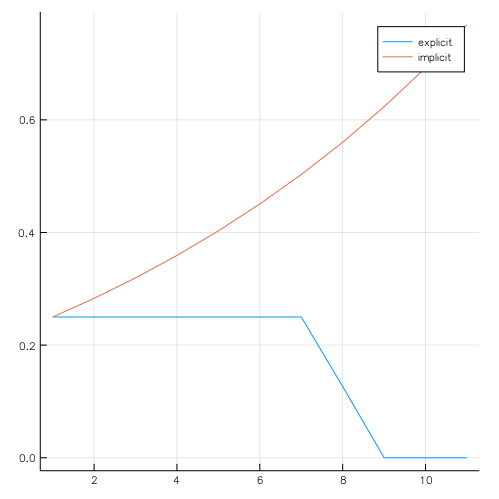

In [21]:
ts = cumsum([Δt for i in 1:N]);
plot(traj_exp[11,:],label="explicit")
plot!(traj_imp[11,:],label="implicit")

In [19]:
display(traj_exp[1:7,8])
display(traj_exp[8:13,8])
display(traj_exp[14:20,8])
# display(traj_exp[1:7,7])
# display(traj_exp[8:13,7])

7-element Array{Float64,1}:
  1.0        
  7.14e-12   
  7.14e-12   
  7.14e-12   
  0.016266   
  7.52931e-12
 -1.40047e-9 

6-element Array{Float64,1}:
  7.0e-12    
  7.0e-12    
  7.0e-12    
  0.1266     
  6.52902e-12
 -0.439901   

7-element Array{Float64,1}:
 0.0       
 2.4782e-8 
 2.93087e-8
 1.25789   
 2.93087e-8
 0.1266    
 2.51579   

In [ ]:
# display(traj_imp[1:7,8])
# display(traj_imp[8:13,8])
display(traj_imp[1:7,9])
display(traj_imp[8:13,9])

In [ ]:
display(traj_exp[8:13,5:9])
display(traj_imp[8:13,5:9])

In [ ]:
println(traj_exp[7+6+1:end,9])
# println(traj_imp[7+6+1:end,9])

In [ ]:
display("explicit")
display(traj_exp[14:end,9])
display("implicit")
display(traj_imp[14:end,9])

In [ ]:
println(traj_imp[14:end,9])

In [ ]:
DrakeVisualizer.any_open_windows() || (DrakeVisualizer.new_window(); sleep(1));
geometries = visual_elements(mechanism, URDFVisuals(urdf))
vis = Visualizer(mechanism, geometries);

In [ ]:
traj = traj_exp
qs = [traj[1:num_positions(x0),i] for i in 1:N]
ts = cumsum([Δt for i in 1:N]);
RigidBodyTreeInspector.animate(vis, mechanism, ts, qs; realtimerate = .25);